In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


# Importing Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the CSV File

In [3]:
df=pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')

#  Attributes Description:
**Independet Features**
1.  age: (numeric)

2.  job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.  marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  education: (categorical: primary, secondary, tertiary and unknown)
5.  default: has credit in default? (categorical: 'no','yes','unknown')
6.  housing: has housing loan? (categorical: 'no','yes','unknown')
7.  loan: has personal loan? (categorical: 'no','yes','unknown')
8.  balance: Balance of the individual.
9.  contact: contact communication type (categorical: 'cellular','telephone')
10.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11.  day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then deposit='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
13.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15.  previous: number of contacts performed before this campaign and for this client (numeric)
16.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Dependent Feature**

17.  deposit: has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
#below function prints the basic information of dataset for clear understanding the dataset.
def SevenSigma(df):
    print(f"Shape of the dataset is : {df.shape}")
    print("")
    print("")
    print("Sample from Dataset")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("")
    print("")
    print("information of Dataset")
    display(df.info())
    print("")
    print("")
    print("description of Dataset for numeric features")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("")
    print("")
    print("description of Dataset for categorical features")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("")
    print("")
    print("corelation")
    sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
    fig=plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()
    print("")
    print("")
    print("null values in dataset")
    display(df.isnull().mean()*100)
    print("")
    print("")
    print("duplicate rows in dataset")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

Shape of the dataset is : (11162, 17)


Sample from Dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
4694,52,technician,single,secondary,no,436,no,yes,unknown,22,mar,95,1,-1,0,unknown,yes
8201,29,management,married,tertiary,no,941,yes,no,unknown,4,jun,570,11,-1,0,unknown,no
3441,31,admin.,single,secondary,no,410,no,no,cellular,23,apr,342,1,-1,0,unknown,yes
2284,49,technician,married,secondary,no,905,no,no,cellular,5,jun,1543,1,-1,0,unknown,yes
2698,50,management,divorced,tertiary,no,810,no,no,cellular,15,sep,91,1,103,3,success,yes




information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None



description of Dataset for numeric features


,count,mean,std,min,25%,50%,75%,max
age,11162.000000,41.231948,11.913369,18.000000,32.000000,39.000000,49.000000,95.000000
balance,11162.000000,1528.538524,3225.413326,-6847.000000,122.000000,550.000000,1708.000000,81204.000000
day,11162.000000,15.658036,8.420740,1.000000,8.000000,15.000000,22.000000,31.000000
duration,11162.000000,371.993818,347.128386,2.000000,138.000000,255.000000,496.000000,3881.000000
campaign,11162.000000,2.508421,2.722077,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,11162.000000,51.330407,108.758282,-1.000000,-1.000000,-1.000000,20.750000,854.000000
previous,11162.000000,0.832557,2.292007,0.000000,0.000000,0.000000,1.000000,58.000000




description of Dataset for categorical features


,count,unique,top,freq
job,11162,12,management,2566
marital,11162,3,married,6351
education,11162,4,secondary,5476
default,11162,2,no,10994
housing,11162,2,no,5881
loan,11162,2,no,9702
contact,11162,3,cellular,8042
month,11162,12,may,2824
poutcome,11162,4,unknown,8326
deposit,11162,2,no,5873




corelation


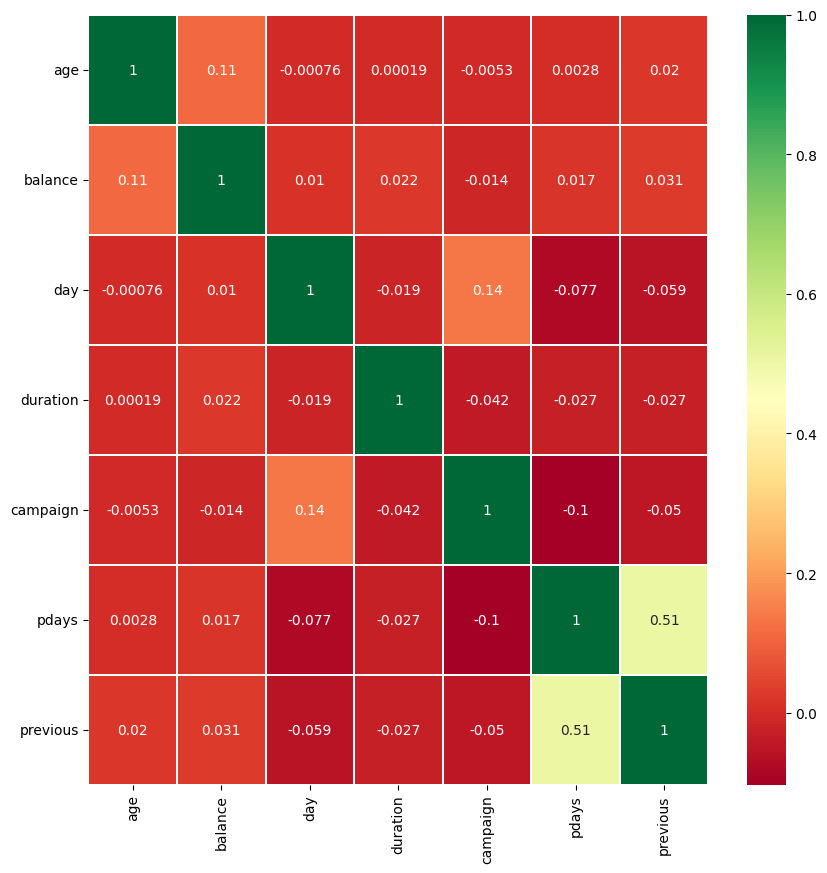



null values in dataset


age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64



duplicate rows in dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit


In [5]:
SevenSigma(df)

In [6]:
df.sample(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
7727,56,blue-collar,married,primary,no,0,no,no,cellular,7,aug,152,6,-1,0,unknown,no
8770,53,services,divorced,primary,no,778,yes,no,cellular,17,apr,221,2,-1,0,unknown,no
1655,21,student,single,secondary,no,224,no,no,cellular,30,apr,871,1,-1,0,unknown,yes
8975,26,admin.,single,secondary,no,-326,yes,no,unknown,19,may,128,3,-1,0,unknown,no
4180,39,management,married,secondary,no,215,no,no,cellular,11,aug,1141,4,-1,0,unknown,yes
3962,58,management,married,tertiary,no,0,no,no,cellular,14,sep,358,2,-1,0,unknown,yes
1834,44,blue-collar,married,primary,no,4031,yes,no,cellular,7,may,983,4,-1,0,unknown,yes
9219,49,unemployed,married,secondary,no,13818,no,no,cellular,21,nov,201,1,113,2,failure,no
9705,51,self-employed,married,secondary,no,4920,no,no,telephone,2,jun,392,2,-1,0,unknown,no
4326,45,management,married,tertiary,no,226,yes,no,cellular,13,aug,177,6,179,10,success,yes
